### 데이터 준비

In [1]:
import pandas as pd
import pm4py
import numpy as np
from itertools import *
import graphviz
from tqdm import tqdm

In [49]:
data_prod = pm4py.read_xes(r'C:\PROJECT\0_중견\Dataset\Production.xes')

parsing log, completed traces :: 100%|██████████| 225/225 [00:00<00:00, 740.65it/s]


In [50]:
data_prod.head(1)

,Qty for MRB,Work Order Qty,Resource,Qty Completed,Span,Part Desc.,concept:name,Start Timestamp,Report Type,Qty Rejected,Worker ID,Complete Timestamp,lifecycle:transition,case:concept:name,Rework
0,0,10,Machine 4 - Turning & Milling,1,006:19,Cable Head,Turning & Milling - Machine 4,2012-01-29 15:24:00+00:00,S,0,ID4932,2012-01-29 21:43:00+00:00,complete,Case 1,NaN


### Activity M/C별로 구분

In [51]:
data_prod['concept:name'].unique()

array(['Turning & Milling - Machine 4', 'Turning & Milling Q.C.',
       'Laser Marking - Machine 7', 'Lapping - Machine 1',
       'Round Grinding - Machine 3', 'Final Inspection Q.C.', 'Packing',
       'Turning & Milling - Machine 9', 'Turning Q.C.',
       'Flat Grinding - Machine 11', 'Turning & Milling - Machine 8',
       'Grinding Rework - Machine 12', 'Setup - Machine 8',
       'Round Grinding - Machine 12', 'Round Grinding - Manual',
       'Round Grinding - Q.C.', 'Turning & Milling - Machine 5',
       'Turning & Milling - Machine 10', 'Round Grinding - Machine 2',
       'Turning & Milling - Machine 6', 'Turning - Machine 4',
       'Grinding Rework', 'SETUP     Turning & Milling - Machine 5',
       'Final Inspection - Weighting', 'Turning - Machine 9',
       'Deburring - Manual', 'Turning - Machine 8',
       'Wire Cut - Machine 13', 'Wire Cut - Machine 18',
       'Rework Milling - Machine 28', 'Fix EDM', 'Milling Q.C.',
       'Milling - Machine 14', 'Flat Grinding -

In [52]:
data_prod['concept:name'].nunique()

55

In [84]:
# MC 구별한 Variant
mc_category_variant = pm4py.get_variants(data_prod,activity_key='concept:name',case_id_key='case:concept:name',timestamp_key='Start Timestamp')
for i in mc_category_variant:
    set(i)

{'Lapping - Machine 1', 'Turning & Milling - Machine 4', 'Round Grinding - Machine 3', 'Packing', 'Final Inspection Q.C.', 'Turning & Milling Q.C.', 'Laser Marking - Machine 7'}
{'Turning & Milling - Machine 9', 'Packing', 'Final Inspection Q.C.', 'Turning Q.C.', 'Flat Grinding - Machine 11', 'Laser Marking - Machine 7'}
{'Lapping - Machine 1', 'Round Grinding - Machine 3', 'Turning & Milling - Machine 8', 'Packing', 'Grinding Rework - Machine 12', 'Final Inspection Q.C.', 'Flat Grinding - Machine 11', 'Turning & Milling Q.C.', 'Laser Marking - Machine 7'}
{'Lapping - Machine 1', 'Round Grinding - Machine 12', 'Turning & Milling - Machine 8', 'Packing', 'Final Inspection Q.C.', 'Flat Grinding - Machine 11', 'Setup - Machine 8', 'Turning & Milling Q.C.', 'Laser Marking - Machine 7'}
{'Lapping - Machine 1', 'Round Grinding - Machine 3', 'Turning & Milling - Machine 8', 'Packing', 'Final Inspection Q.C.', 'Turning & Milling Q.C.', 'Round Grinding - Q.C.', 'Round Grinding - Manual', 'Laser

In [70]:
i,j,k = pm4py.discover_petri_net_inductive(data_prod,activity_key='concept:name',case_id_key='case:concept:name',timestamp_key='Start Timestamp')
pm4py.view_petri_net(i,j,k)

### M/C별로 구분 X 

In [55]:
mcsplit_prod = data_prod.copy()

In [57]:
for i in range(0,len(mcsplit_prod)):
    mcsplit_prod.iloc[i,6] = mcsplit_prod.iloc[i,6].split(' -')[0]

In [59]:
mcsplit_prod['concept:name'].unique()

array(['Turning & Milling', 'Turning & Milling Q.C.', 'Laser Marking',
       'Lapping', 'Round Grinding', 'Final Inspection Q.C.', 'Packing',
       'Turning Q.C.', 'Flat Grinding', 'Grinding Rework', 'Setup',
       'Turning', 'SETUP     Turning & Milling', 'Final Inspection',
       'Deburring', 'Wire Cut', 'Rework Milling', 'Fix EDM',
       'Milling Q.C.', 'Milling', 'Fix', 'Round  Q.C.', 'Stress Relief',
       'Turning Rework', 'Change Version', 'Turn & Mill. & Screw Assem',
       'Nitration Q.C.'], dtype=object)

In [60]:
mcsplit_prod['concept:name'].nunique()

27

In [77]:
pm4py.get_variants(mcsplit_prod,activity_key='concept:name',case_id_key='case:concept:name',timestamp_key='Start Timestamp')

{('Turning & Milling',
  'Turning & Milling',
  'Turning & Milling',
  'Turning & Milling',
  'Turning & Milling Q.C.',
  'Laser Marking',
  'Lapping',
  'Lapping',
  'Lapping',
  'Lapping',
  'Round Grinding',
  'Round Grinding',
  'Final Inspection Q.C.',
  'Final Inspection Q.C.',
  'Final Inspection Q.C.',
  'Packing'): 1,
 ('Turning & Milling',
  'Turning Q.C.',
  'Turning & Milling',
  'Turning & Milling',
  'Turning & Milling',
  'Turning & Milling',
  'Turning & Milling',
  'Turning & Milling',
  'Turning & Milling',
  'Turning & Milling',
  'Turning & Milling',
  'Turning & Milling',
  'Turning & Milling',
  'Turning & Milling',
  'Turning & Milling',
  'Turning Q.C.',
  'Laser Marking',
  'Laser Marking',
  'Laser Marking',
  'Flat Grinding',
  'Flat Grinding',
  'Flat Grinding',
  'Final Inspection Q.C.',
  'Packing'): 1,
 ('Turning & Milling',
  'Turning & Milling',
  'Turning & Milling',
  'Turning & Milling',
  'Turning & Milling Q.C.',
  'Laser Marking',
  'Flat Grinding

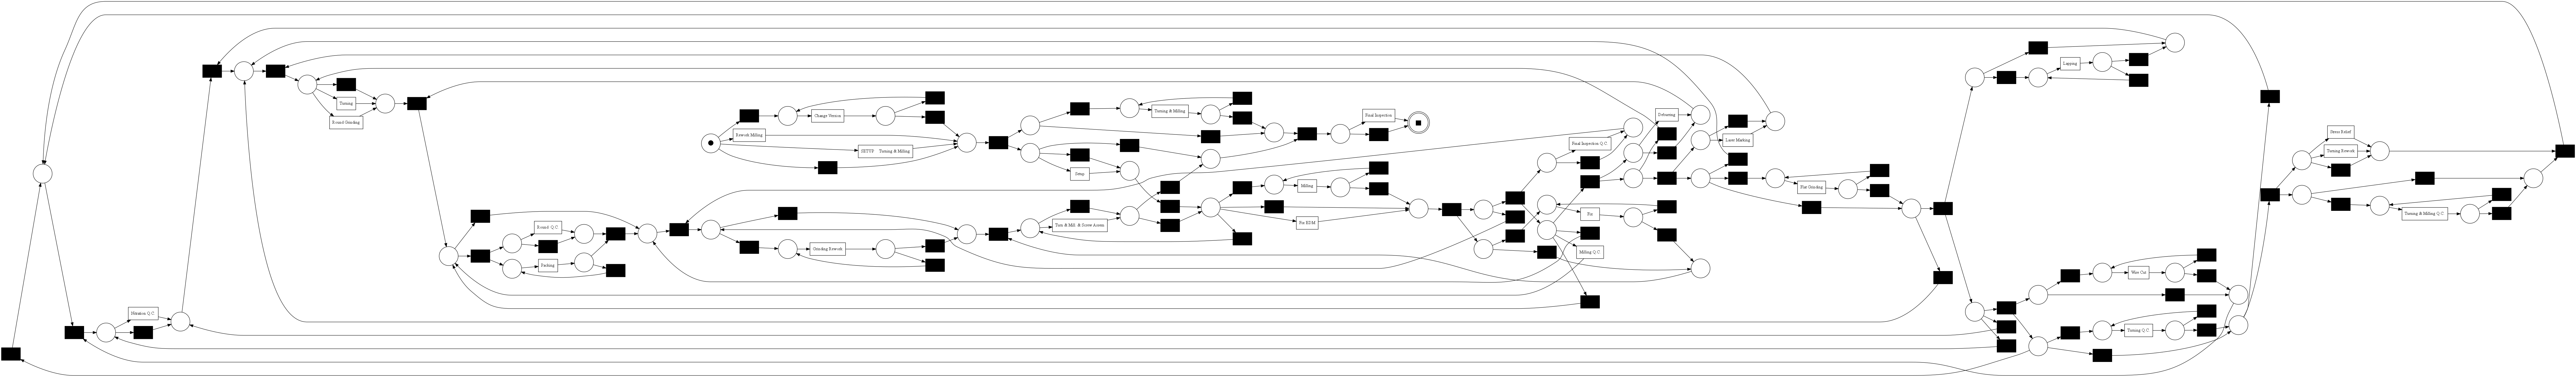

In [71]:
i,j,k = pm4py.discover_petri_net_inductive(mcsplit_prod,activity_key='concept:name',case_id_key='case:concept:name',timestamp_key='Start Timestamp')
pm4py.view_petri_net(i,j,k)

In [72]:
mcsplit_prod.to_csv('mcsplit.csv',index=False,encoding='cp949')